In [47]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', None)

import matplotlib as mpl
plt.rcParams.update({'figure.dpi': 100})
mpl.rcParams.update({'figure.autolayout': False})
mpl.rcParams['mathtext.fontset'] = "cm"
mpl.rcParams['font.family'] = "DejaVu Serif"
mpl.rcParams['mathtext.fontset'] = "cm"
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

In [10]:
from Plot import scatter_value_2D, Sctter2D
df_X2 = pd.read_csv('data/df_X2.csv',index_col=0)
latent_variables = np.load('data/Latent_variables_X2.npy')
df_X2

,log_M*,logSFR_SED,logsSFR,exp_met,exp_veldisp,exp_tau,A_FUV,A_B,A_V
0,10.086,0.163,-9.923,-0.315716,59.32987,20275.2090,1.393,0.222,0.141
1,9.827,-0.542,-10.369,-0.223048,68.51776,3220.3936,3.772,0.541,0.340
...,...,...,...,...,...,...,...,...,...
27171,10.620,-1.483,-12.103,0.037331,134.46507,2154.0120,1.895,0.291,0.193
27172,10.464,-1.486,-11.950,-0.256338,118.39738,2716.9600,0.898,0.138,0.094


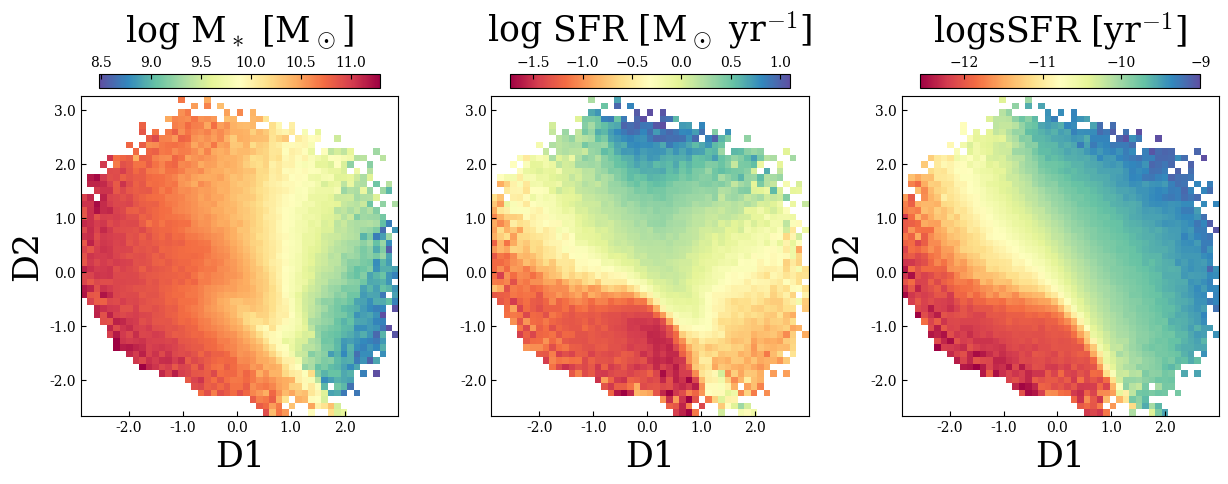

In [16]:

col_list = [
    'log_M*', 'logSFR_SED',  'logsSFR'
]
yticklabels = [
    'log M$_*$ [M$_\odot$]','log SFR [M$_\odot$ yr$^{-1}$]','logsSFR [yr$^{-1}$]',
]
cmap_list = [
    plt.cm.Spectral_r,plt.cm.Spectral,plt.cm.Spectral
]
fig_list = [
    'Figure/M_VAE4_1_and_2.pdf', 'Figure/SFR_VAE4_1_and_2.pdf', 'Figure/sSFR_VAE4_1_and_2.pdf'
]
x,y = 0,1
i = 0
plt.figure(figsize=(15,5),dpi = 100)
for i in range(3):
    plt.subplot(1,3,i+1)
    Sctter2D(
        # create sample data
        x = latent_variables[:,x],
        y = latent_variables[:,y],
        z = df_X2[col_list[i]].values,
        xlabel='D{}'.format(x+1),
        ylabel='D{}'.format(y+1),
        cmap=cmap_list[i],
        mainlabel=yticklabels[i],
        plot_criteria=5,
        bins=50,
        label_font = 25,
        mainlabelsize=25,
        aspect = 20, pad = 0.02,
        shrink = 0.82,
        savefig=fig_list[i]
    )
plt.show()

In [24]:
df_M = pd.read_csv('data/df_mophology.csv',index_col=0)
latent_variables_M = np.load('data/Latent_variables_mophology.npy')
df_M

,M15,Pdisk,Pedgeon,PbarGZ2,PbarNair10,Pmerg,Pbulge,Pcigar,TType,PS0
0,614842,0.000167,9.714340e-08,0.022344,0.676898,0.104517,0.000279,0.006452,4.29667,0.998465
1,266239,0.000012,7.606980e-04,0.004431,0.153907,0.073302,0.949194,0.000305,-2.14477,0.860579
...,...,...,...,...,...,...,...,...,...,...
20781,583184,0.975729,3.055490e-05,0.205171,0.542586,0.342491,0.073759,0.032988,4.27968,0.997594
20782,155436,0.000002,9.201240e-03,0.026655,0.019223,0.409290,0.967728,0.000082,-2.31205,0.677125


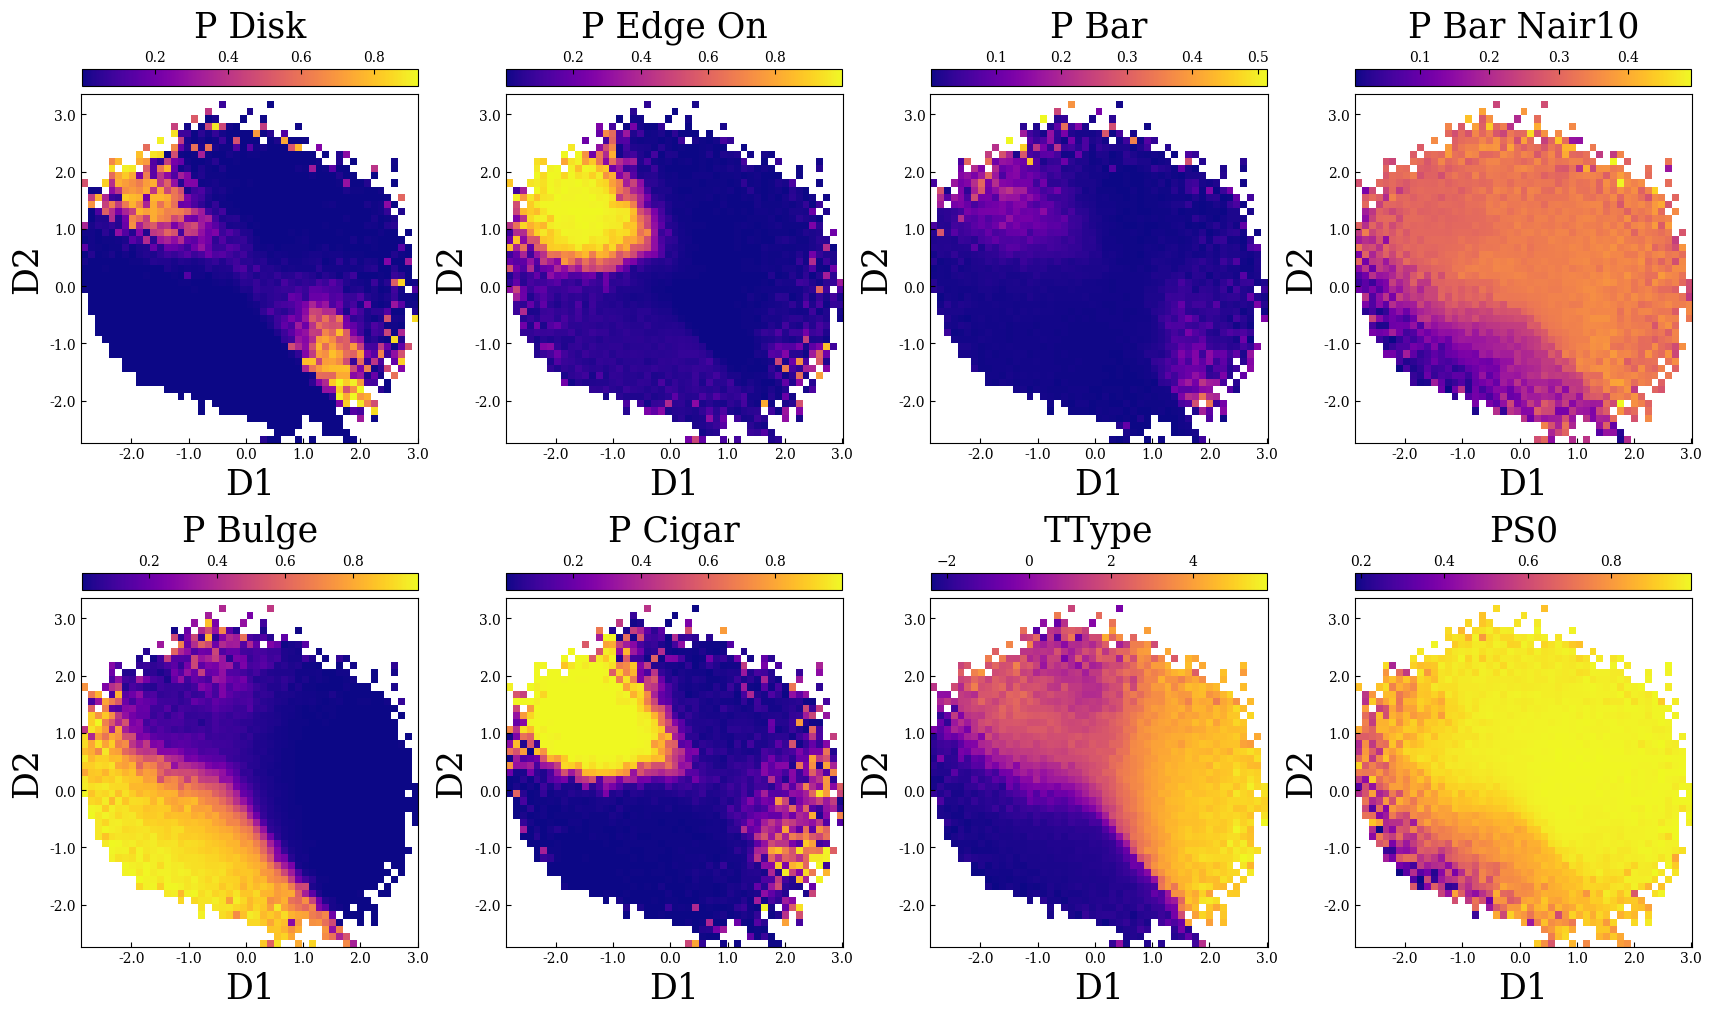

In [45]:
col_list = [
    'Pdisk', 'Pedgeon', 'PbarGZ2', 'PbarNair10', 'Pbulge', 'Pcigar', 'TType', 'PS0'
]
yticklabels = [
    'P Disk', 'P Edge On', 'P Bar', 'P Bar Nair10', 'P Bulge', 'P Cigar' , 'TType', 'PS0'
]
fig_list = [
    'Figure/Pdisk_VAE4_1_and_2.pdf', 'Figure/Pedgeon_VAE4_1_and_2.pdf', 'Figure/Pbar_VAE4_1_and_2.pdf',
    'Figure/PbarNair10_VAE4_1_and_2.pdf', 'Figure/Pbulge_VAE4_1_and_2.pdf',
    'Figure/Pcigar_VAE4_1_and_2.pdf', 'Figure/TType_VAE4_1_and_2.pdf', 'Figure/PS0_VAE4_1_and_2.pdf'
]
x,y = 0,1
i = 0
plt.figure(figsize=(21,12),dpi = 100)
for i in range(8):
    plt.subplot(2,4,i+1)
    Sctter2D(
        # create sample data
        x = latent_variables_M[:,x],
        y = latent_variables_M[:,y],
        z = df_M[col_list[i]].values,
        xlabel='D{}'.format(x+1),
        ylabel='D{}'.format(y+1),
        cmap=plt.cm.plasma,
        mainlabel=yticklabels[i],
        plot_criteria=5,
        bins=50,
        label_font = 25,
        mainlabelsize=25,
        aspect = 20,
        pad = 0.02,
        shrink = 0.95,
        savefig=fig_list[i]
    )
plt.show()

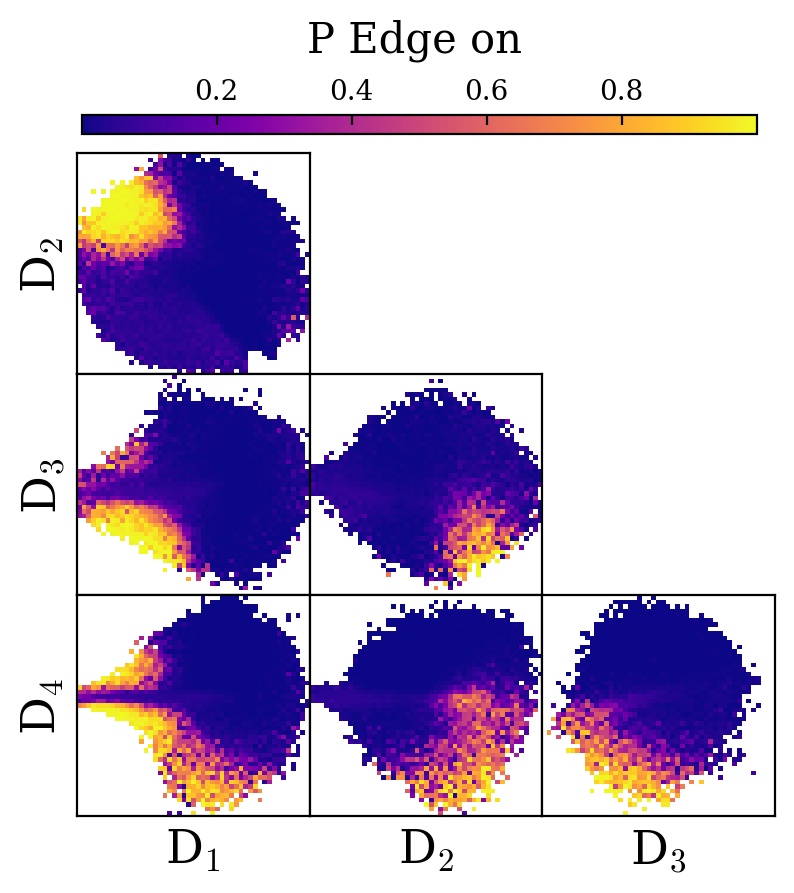

In [30]:
scatter_value_2D(
    c = df_M['Pedgeon'].values,
    pca_latent=latent_variables_M,
    cmap=plt.cm.plasma,
    plot_criteria = 20,
    label = 'P Edge on',
    colorbar_position = [0.13, 0.82, 0.75, 0.02], # x,y,horizontal,height
    bins=50,
    labelsize = 17,
    suptitlesize = 15,
    xlim = 1,
    vmin=None,
    vmax=None,
    Colorbar = True,
)